In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

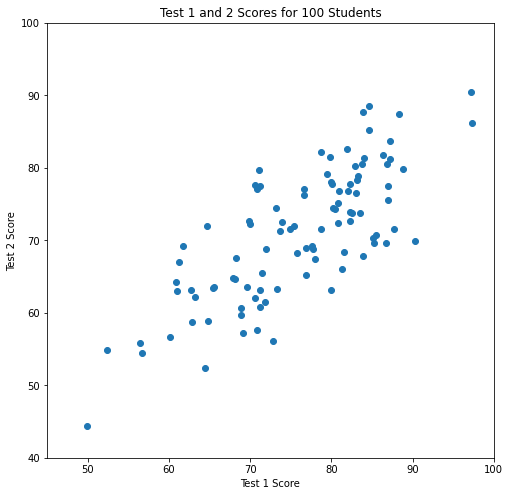

In [2]:
#Randomly generates 100 points from a multivariate normal distribution to simulate test scores for 100 students
#from two tests, and plots the points.

np.random.seed(seed=3)
g = np.random.multivariate_normal([75, 70], [[100, 80], [80, 100]], size=100)
x = g[:,0]
y = g[:,1]

%matplotlib inline

plt.subplots(figsize=(8,8));
plt.scatter(x,y);
plt.xlabel('Test 1 Score');
plt.ylabel('Test 2 Score');
plt.title('Test 1 and 2 Scores for 100 Students');
plt.xlim([45,100]);
plt.ylim([40,100]);

In [3]:
#The direct calculation of the slope of the line through the origin that minimizes the mean squared error
#(the formula for which is derived using Calculus I techniques).

m = np.sum(x*y)/np.sum(x**2)
m

0.9302295883062465

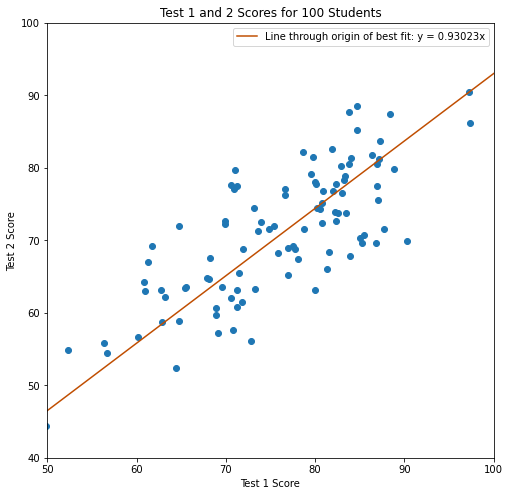

In [4]:
#Plots the points again with the least-squares line through the origin.

plt.subplots(figsize=(8,8));
plt.scatter(x, y)
plt.xlabel('Test 1 Score');
plt.ylabel('Test 2 Score');
plt.title('Test 1 and 2 Scores for 100 Students');
plt.xlim([50,100]);
plt.ylim([40,100]);
m_rounded = round(m, 5)
plt.plot([49, 100], [m*49, m*100],
         label=f'Line through origin of best fit: y = {m_rounded}x',
         color='xkcd:burnt orange');
plt.legend();

In [5]:
def MSE(theta, x, y):
    n = len(x)
    return (1 / n) * np.sum((y - theta * x)**2)

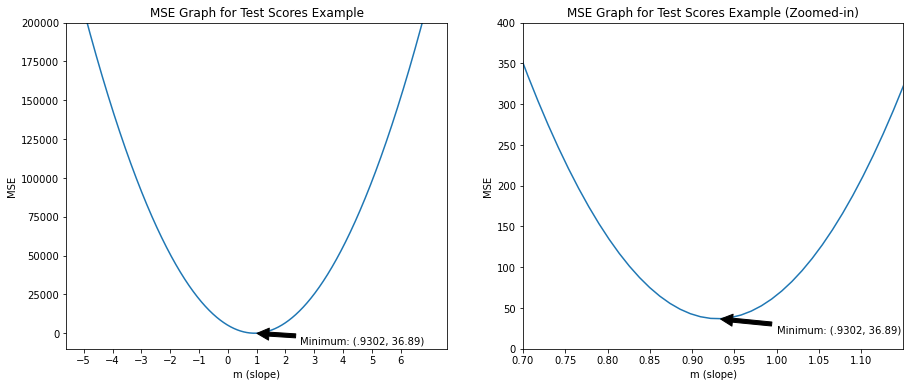

In [6]:
thetas = np.linspace(-5, 7, 1000)
costs = [MSE(theta, x, y) for theta in thetas]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15,6));

for ax in [ax1, ax2]:
    ax.plot(thetas, costs);
    ax.set_xlabel('m (slope)');
    ax.set_ylabel('MSE');
    
ax1.set_title('MSE Graph for Test Scores Example');
ax1.set_ylim(-10000, 200000)
ax1.set_xticks(ticks=np.arange(-5, 7, step=1.0));
ax1.annotate('Minimum: (.9302, 36.89)', xy=(.9302, 36.89), xytext=(2.5, -7000),
            arrowprops=dict(facecolor='black', shrink=0.05));

ax2.set_title('MSE Graph for Test Scores Example (Zoomed-in)');
ax2.set_xlim(.7, 1.15);
ax2.set_ylim(0,400);
ax2.set_xticks(ticks=np.arange(.7, 1.15, step=.05));
ax2.annotate('Minimum: (.9302, 36.89)', xy=(.9302, 36.89), xytext=(1.0, 20),
            arrowprops=dict(facecolor='black', shrink=0.05));

Using matplotlib backend: <object object at 0x000001FB275F35D0>


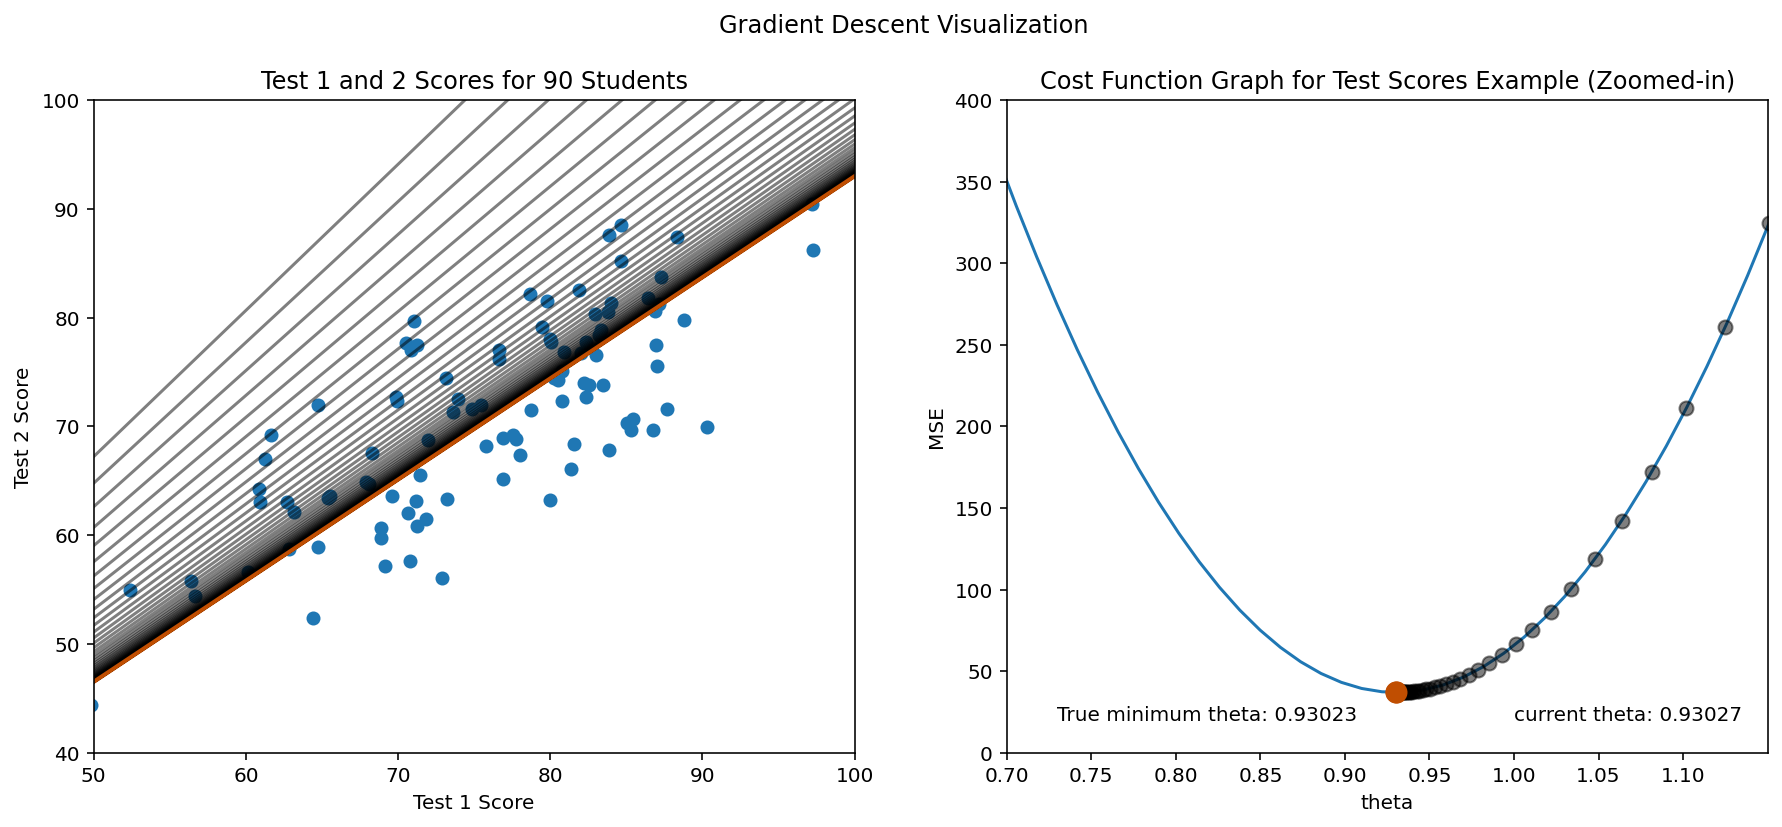

In [7]:
%matplotlib

eta = 0.00001 #learning rate
n_iterations = 75
initial_theta = 1.4
theta = initial_theta

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15,6));
fig.suptitle('Gradient Descent Visualization')

ax1.scatter(x, y)
ax1.plot([49, 100], [m*49, m*100], color='xkcd:burnt orange', linewidth=2.0);
ax1.set_xlabel('Test 1 Score');
ax1.set_ylabel('Test 2 Score');
ax1.set_title('Test 1 and 2 Scores for 90 Students');
ax1.set_xlim([50,100]);
ax1.set_ylim([40,100]);

ax2.plot(thetas, costs);
ax2.plot(m, MSE(m, x, y), marker='o', markersize=10, color='xkcd:burnt orange');
ax2.set_xlabel('theta');
ax2.set_ylabel('MSE');
ax2.set_title('Cost Function Graph for Test Scores Example (Zoomed-in)');
ax2.set_xlim(.7, 1.15);
ax2.set_ylim(0,400);
ax2.set_xticks(ticks=np.arange(.7, 1.15, step=.05));
ax2.text(.73,  20, f'True minimum theta: {m_rounded}')

for iteration in range(n_iterations):
    gradient = -(2 / 100) * x.dot(y - theta * x)
    theta = theta - eta * gradient
    theta_rounded = round(theta, 5)
    line1, = ax1.plot([49, 100], [theta*49, theta*100],
         label=f'Current line: y = {theta_rounded}x',
         color='black');
    line2, = ax2.plot(theta, MSE(theta, x, y), marker='o', markersize=7, color='black');
    text = ax2.text(1, 20, f'current theta: {theta_rounded}')
    plt.draw()
    plt.pause(0.07)
    line1.remove()
    line2.remove()
    ax1.plot([49, 100], [theta*49, theta*100],
         label=f'Current line: y = {theta_rounded}x',
         color='black', alpha=0.5);
    ax2.plot(theta, MSE(theta, x, y), marker='o', markersize=7, color='black', alpha=0.5);
    text.remove()
    
text = ax2.text(1, 20, f'current theta: {theta_rounded}');
ax1.plot([49, 100], [m*49, m*100], color='xkcd:burnt orange', linewidth=2.0);
ax2.plot(m, MSE(m, x, y), marker='o', markersize=10, color='xkcd:burnt orange');

fig

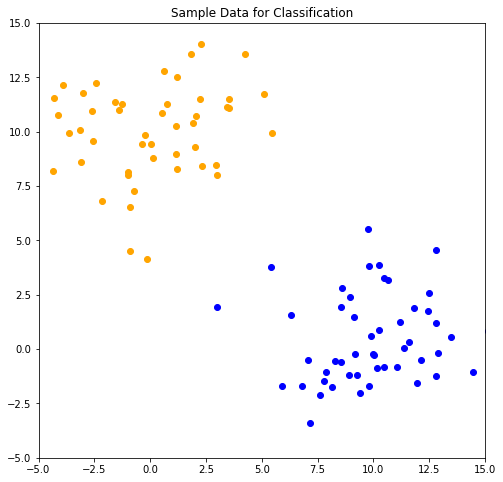

In [8]:
%matplotlib inline
np.random.seed(seed=5)

blues = np.random.multivariate_normal([10, 0], [[6, 0],[0,6]], size=50)
oranges = np.random.multivariate_normal([0, 10], [[6, 0],[0,6]], size=50)
blue_1, blue_2 = blues[:,0], blues[:, 1]
orange_1, orange_2 = oranges[:,0], oranges[:, 1]

fig, ax = plt.subplots(figsize=(8,8));
ax.scatter(blue_1, blue_2, color='blue');
ax.scatter(orange_1, orange_2, color='orange');
ax.set_title('Sample Data for Classification');
ax.set_xlim(-5, 15);
ax.set_ylim(-5, 15);

In [9]:
def lg(x):
    return 1 / (1 + np.exp(-x))

Using matplotlib backend: QtAgg


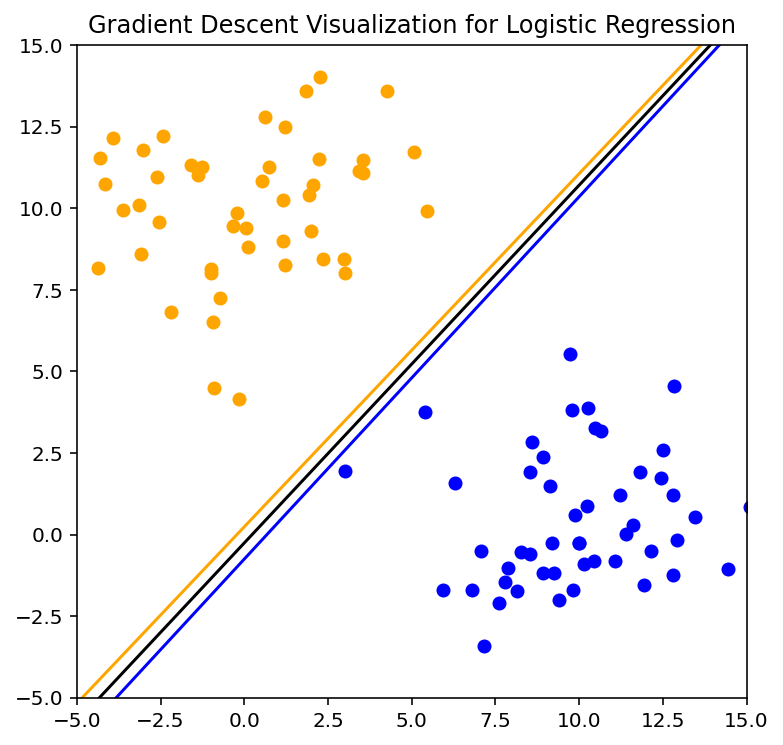

In [10]:
%matplotlib

eta = 0.005 #learning rate
n_iterations = 200

np.random.seed(seed=4)
initial_theta = np.random.randn(3)
theta = initial_theta

X = np.concatenate((blues, oranges))
labels = np.concatenate((np.zeros(50), np.ones(50)))
X_b = np.c_[np.ones((100, 1)), X]

fig, ax = plt.subplots(figsize=(6,6));
ax.set_title('Gradient Descent Visualization for Logistic Regression')
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)

ax.scatter(blue_1, blue_2, color='blue');
ax.scatter(orange_1, orange_2, color='orange');

def theta_line(theta, x):
    return -(theta[1] / theta[2]) * x - (theta[0] / theta[2])

for iteration in range(n_iterations):
    gradients = (1 / 100) * X_b.T.dot(lg(X_b.dot(theta)) - labels)
    theta = theta - eta * gradients
    line, = ax.plot([-5, 15], [theta_line(theta, -5), theta_line(theta, 15)], color='black');
    line_orange, = ax.plot([-5, 15],
                           [theta_line(theta, -5) + .1 / theta[2], theta_line(theta, 15)] + .1 / theta[2],
                           color='orange');
    line_blue, = ax.plot([-5, 15],
                           [theta_line(theta, -5) - .1 / theta[2], theta_line(theta, 15)] - .1 / theta[2],
                           color='blue');
    plt.draw()
    plt.pause(0.004)
    line.remove()
    line_orange.remove()
    line_blue.remove()

ax.plot([-5, 15], [theta_line(theta, -5), theta_line(theta, 15)], color='black');
ax.plot([-5, 15], [theta_line(theta, -5) + .1 / theta[2], theta_line(theta, 15)] + .1 / theta[2], color='orange');
ax.plot([-5, 15], [theta_line(theta, -5) - .1 / theta[2], theta_line(theta, 15)] - .1 / theta[2], color='blue');
fig

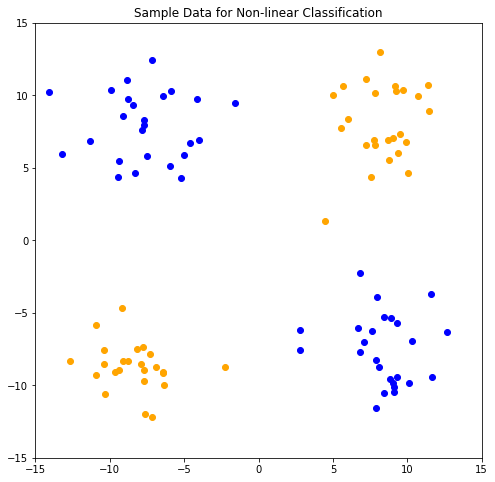

In [11]:
%matplotlib inline
np.random.seed(seed=6)

blues2_a = np.random.multivariate_normal([-8, 8], [[6, 0],[0,6]], size=25)
blues2_b = np.random.multivariate_normal([8, -8], [[6, 0],[0,6]], size=25)
blues2 = np.concatenate([blues2_a, blues2_b])
oranges2_a = np.random.multivariate_normal([-8, -8], [[6, 0],[0,6]], size=25)
oranges2_b = np.random.multivariate_normal([8, 8], [[6, 0],[0,6]], size=25)
oranges2 = np.concatenate([oranges2_a, oranges2_b])

blue2_1, blue2_2 = blues2[:,0], blues2[:, 1]
orange2_1, orange2_2 = oranges2[:,0], oranges2[:, 1]

fig, ax = plt.subplots(figsize=(8,8));
ax.scatter(blue2_1, blue2_2, color='blue');
ax.scatter(orange2_1, orange2_2, color='orange');
ax.set_title('Sample Data for Non-linear Classification');
ax.set_xlim(-15, 15);
ax.set_ylim(-15, 15);

Using matplotlib backend: QtAgg


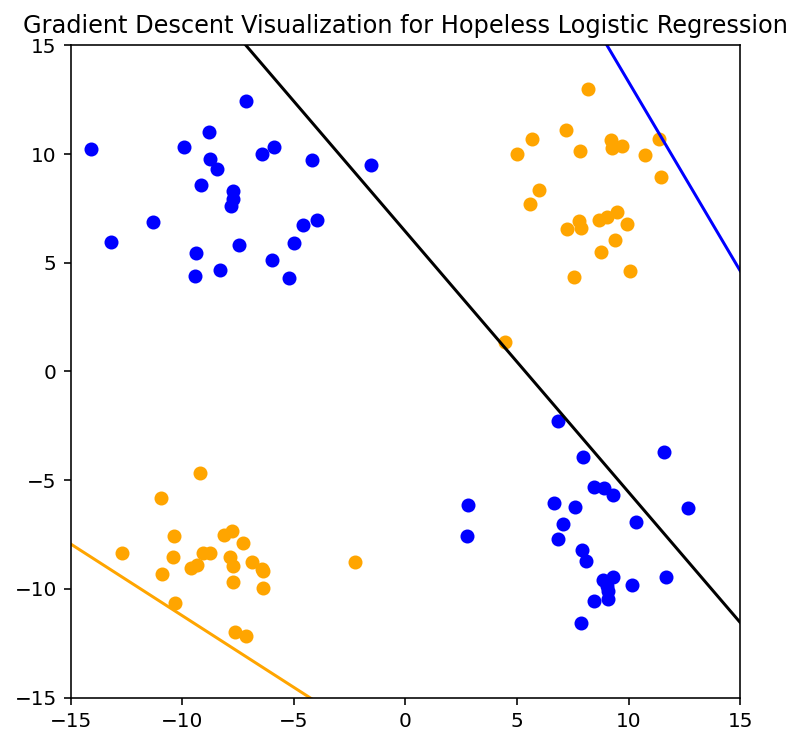

In [12]:
%matplotlib

eta = 0.005 #learning rate
n_iterations = 200

np.random.seed(seed=4)
initial_theta = np.random.randn(3)
theta = initial_theta

X2 = np.concatenate((blues2, oranges2))
labels = np.concatenate((np.zeros(50), np.ones(50)))
X2_b = np.c_[np.ones((100, 1)), X2]

fig, ax = plt.subplots(figsize=(6,6));
ax.set_title('Gradient Descent Visualization for Hopeless Logistic Regression')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

ax.scatter(blue2_1, blue2_2, color='blue');
ax.scatter(orange2_1, orange2_2, color='orange');

def theta_line(theta, x):
    return -(theta[1] / theta[2]) * x - (theta[0] / theta[2])

for iteration in range(n_iterations):
    gradients = (1 / 100) * X2_b.T.dot(lg(X2_b.dot(theta)) - labels)
    theta = theta - eta * gradients
    line, = ax.plot([-15, 15], [theta_line(theta, -15), theta_line(theta, 15)], color='black');
    line_orange, = ax.plot([-15, 15],
                           [theta_line(theta, -15) + .1 / theta[2], theta_line(theta, 15)] + .1 / theta[2],
                           color='orange');
    line_blue, = ax.plot([-15, 15],
                           [theta_line(theta, -15) - .1 / theta[2], theta_line(theta, 15)] - .1 / theta[2],
                           color='blue');
    plt.draw()
    plt.pause(0.007)
    line.remove()
    line_orange.remove()
    line_blue.remove()

ax.plot([-15, 15], [theta_line(theta, -15), theta_line(theta, 15)], color='black');
ax.plot([-15, 15], [theta_line(theta, -15) + .1 / theta[2], theta_line(theta, 15)] + .1 / theta[2], color='orange');
ax.plot([-15, 15], [theta_line(theta, -15) - .1 / theta[2], theta_line(theta, 15)] - .1 / theta[2], color='blue');
fig

In [13]:
def forward(W_1, b_1, W_2, b_2, X, labels):
    '''
    computes hidden output, final output, and cost for one hidden layer NN, dimensions (2,2,1), logistic activation
    inputs: all numpy arrays, W_1 (2x2), b_1 (2x1), W_2 (1x2), b_2 (1x1), X (mx2), labels (m,)
    outputs: hidden output a_1 (mx2), final output p (mx1), cost (single float)
    '''
    m = len(X)
    labels_reshaped = labels.reshape(m, 1)
    a_1 = lg(b_1 + np.matmul(W_1, X.T)).T
    p = lg(b_2 + np.matmul(W_2, a_1.T)).T
    cost = -(1 / m) * np.sum(labels_reshaped * np.log(p) + (1-labels_reshaped) * np.log(1 - p))
    return a_1, p, cost

def backward(a_1, W_2, p, X, labels):
    '''
    computes gradients for one hidden layer NN, dimensions (2,2,1), logistic activation
    inputs: all numpy arrays, a_1 (mx2), W_2 (1x2), p (mx1), X (mx2), labels (m,)
    outputs: W_1grad (2x2), b_1grad (2x1), W_2grad (1x2), b_2grad (single float)
    '''
    m = len(X)
    labels_reshaped = labels.reshape((m, 1))
    g = (1 / m) * (p - labels_reshaped)
    b_2grad = np.sum(g)
    W_2grad = np.matmul(g.T, a_1)
    g = np.matmul(g, W_2)
    g = np.multiply(g, np.multiply(a_1, 1-a_1))
    b_1grad = np.sum(g, axis=0).T.reshape((2,1))
    W_1grad = np.matmul(g.T, X)
    return W_1grad, b_1grad, W_2grad, b_2grad

In [14]:
def plot_decision_boundaries(W_1, b_1, W_2, b_2, ax):
    b_1_reshaped = b_1.reshape((2,1,1))
    x = np.arange(-15, 15, 0.1)
    y = np.arange(-15, 15, 0.1)
    xx, yy = np.meshgrid(x, y)
    vect = np.array([xx, yy])
    a_1 = lg(np.einsum('an,nij', W_1, vect) + b_1_reshaped)
    equation = np.einsum('...n,nij', W_2, a_1) + b_2
    equation = equation.reshape((300, 300))
    ax.contour(xx, yy, equation, [0])
    ax.contour(xx, yy, equation, [0.25], colors='orange')
    ax.contour(xx, yy, equation, [-0.25], colors='blue')

Using matplotlib backend: QtAgg


C:\Users\cbearden\AppData\Local\Temp\ipykernel_9620\703791172.py:12: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, equation, [-0.25], colors='blue')
C:\Users\cbearden\AppData\Local\Temp\ipykernel_9620\703791172.py:11: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, equation, [0.25], colors='orange')


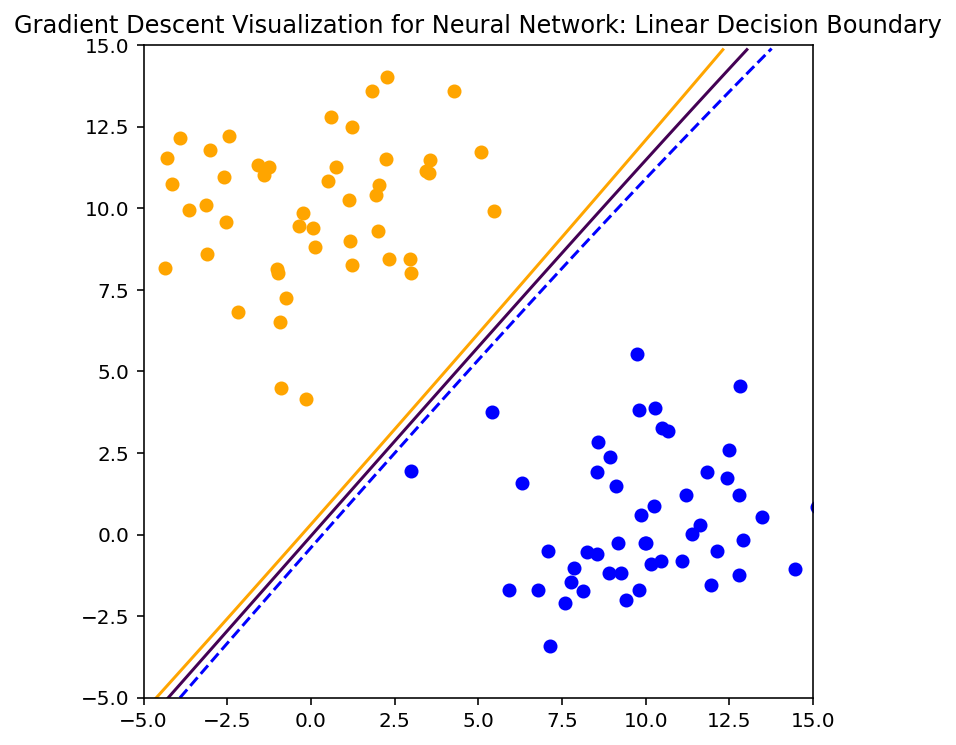

In [15]:
%matplotlib

eta = .1 #learning rate
n_iterations = 450

#Initialize weights and bias parameters.
#(This works better with random initialization, but it's cool to see what happens with a bad start.)
np.random.seed(seed=7)
# W_1 = np.random.randn(2,2)
# b_1 = np.random.randn(2,1)
# W_2 = np.random.randn(1,2)
# b_2 = np.random.randn()
W_1 = np.array([[1,0],[0,1]])
b_1 = np.array([[0],[0]])
W_2 = np.array([[1,-1]])
b_2 = 0

fig, ax = plt.subplots(figsize=(6,6));
ax.set_title('Gradient Descent Visualization for Neural Network: Linear Decision Boundary')
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)

ax.scatter(blue_1, blue_2, color='blue');
ax.scatter(orange_1, orange_2, color='orange');

for iteration in range(n_iterations):
    a_1, p, cost = forward(W_1, b_1, W_2, b_2, X, labels)
    W_1grad, b_1grad, W_2grad, b_2grad = backward(a_1, W_2, p, X, labels)
    W_1 = W_1 - eta * W_1grad
    b_1 = b_1 - eta * b_1grad
    W_2 = W_2 - eta * W_2grad
    b_2 = b_2 - eta * b_2grad
    plot_decision_boundaries(W_1, b_1, W_2, b_2, ax)
    plt.draw()
    plt.pause(0.0000003)
    ax.collections.pop()
    ax.collections.pop()
    ax.collections.pop()
    
plot_decision_boundaries(W_1, b_1, W_2, b_2, ax)

fig

Using matplotlib backend: QtAgg


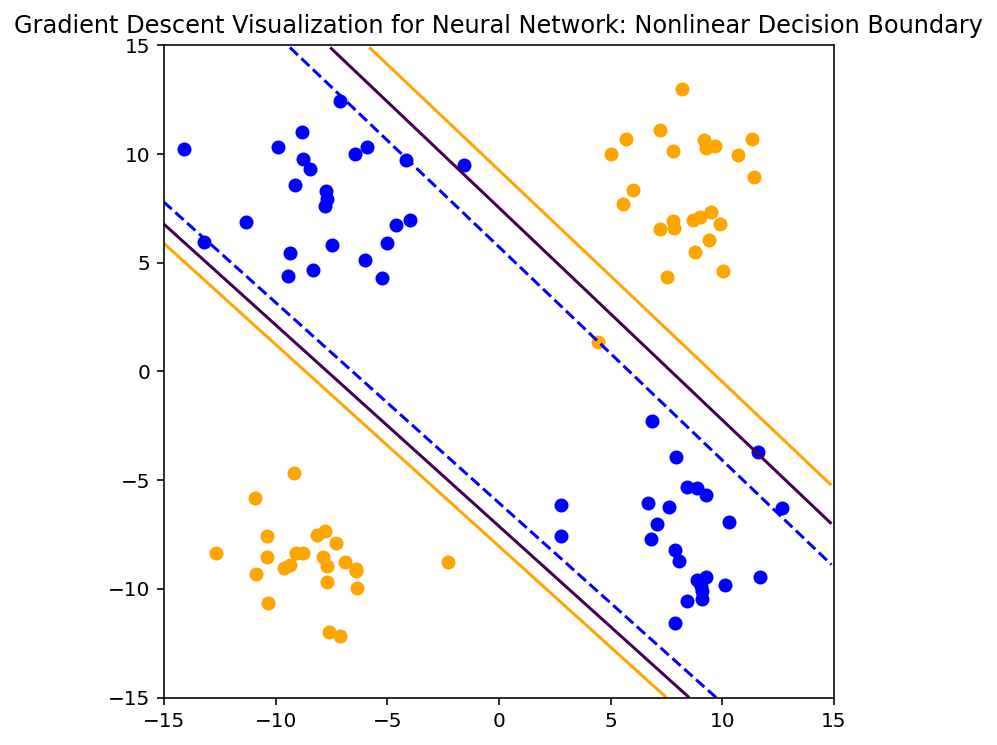

In [16]:
%matplotlib

eta = .0008 #learning rate
n_iterations = 200

#Initialize weights and bias parameters.
# W_1 = np.array([[1,2],[1,1]])
# b_1 = np.array([[1],[1]])
# W_2 = np.array([[1,1]])
# b_2 = 0

#Random initialization:
# np.random.seed(seed=5)
# W_1 = np.random.randn(2,2)
# b_1 = np.random.randn(2,1)
# W_2 = np.random.randn(1,2)
# b_2 = np.random.randn()

#Initialize close to a precomputed solution:
W_1 = np.array([[.05,.05],[.1,.1]])
b_1 = np.array([[1],[2]])
W_2 = np.array([[100/5,-85/5]])
b_2 = 0

fig, ax = plt.subplots(figsize=(6,6));
ax.set_title('Gradient Descent Visualization for Neural Network: Nonlinear Decision Boundary')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

ax.scatter(blue2_1, blue2_2, color='blue');
ax.scatter(orange2_1, orange2_2, color='orange');

for iteration in range(n_iterations):
    a_1, p, cost = forward(W_1, b_1, W_2, b_2, X2, labels)
    W_1grad, b_1grad, W_2grad, b_2grad = backward(a_1, W_2, p, X2, labels)
    W_1 = W_1 - eta * W_1grad
    b_1 = b_1 - eta * b_1grad
    W_2 = W_2 - eta * W_2grad
    b_2 = b_2 - eta * b_2grad
    plot_decision_boundaries(W_1, b_1, W_2, b_2, ax)
    plt.draw()
    plt.pause(0.0000001)
    ax.collections.pop()
    ax.collections.pop()
    ax.collections.pop()
    
plot_decision_boundaries(W_1, b_1, W_2, b_2, ax)

fig

In [17]:
# I didn't end up using these, but these are the forward and backward steps using an ReLU activation function.

def forward_relu(W_1, b_1, W_2, b_2, X, labels):
    '''
    computes hidden output, final output, and cost for one hidden layer NN, dimensions (2,2,1), logistic activation
    inputs: all numpy arrays, W_1 (2x2), b_1 (2x1), W_2 (1x2), b_2 (1x1), X (mx2), labels (m,)
    outputs: hidden output a_1 (mx2), final output p (mx1), cost (single float)
    '''
    m = len(X)
    labels_reshaped = labels.reshape(m, 1)
    a_1 = np.maximum(0, (b_1 + np.matmul(W_1, X.T)).T)
    p = lg(b_2 + np.matmul(W_2, a_1.T)).T
    cost = -(1 / m) * np.sum(labels_reshaped * np.log(p) + (1-labels_reshaped) * np.log(1 - p))
    return a_1, p, cost

def backward_relu(a_1, W_2, p, X, labels):
    '''
    computes gradients for one hidden layer NN, dimensions (2,2,1), logistic activation
    inputs: all numpy arrays, a_1 (mx2), W_2 (1x2), p (mx1), X (mx2), labels (m,)
    outputs: W_1grad (2x2), b_1grad (2x1), W_2grad (1x2), b_2grad (single float)
    '''
    m = len(X)
    labels_reshaped = labels.reshape((m, 1))
    g = (1 / m) * (p - labels_reshaped)
    b_2grad = np.sum(g)
    W_2grad = np.matmul(g.T, a_1)
    g = np.matmul(g, W_2)
    g = np.multiply(g, np.int64(a_1 > 0))
    b_1grad = np.sum(g, axis=0).T.reshape((2,1))
    W_1grad = np.matmul(g.T, X)
    return W_1grad, b_1grad, W_2grad, b_2grad